In [1]:
import pandas as pd
import seaborn as sns
from random import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
MalwareDataset = pd.read_csv("Malware_dataset.csv") 
MalwareDataset=MalwareDataset.sample(frac=1)

In [3]:
print(MalwareDataset.shape)

(100000, 35)


In [4]:
MalwareDataset.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
69589,7ea81b362027866c147218ffa657a1ccc59d677f540bb0...,589,malware,0,0,3069997056,22191,0,0,0,...,28,0,114,1,3204448256,395734,5,1,0,0
21388,com.ezmusicplayer.demo.apk,388,benign,180224,0,3069685760,15950,0,0,0,...,69,0,120,3,3204448256,386603,5,7,0,0
82876,368342ac090a20c9eaa3e4c40f701ee19aabb9fb1177c6...,876,malware,4096,0,3069202432,13989,0,0,0,...,2,1,120,0,3204448256,371993,3,0,0,0
68118,7590e4a832b9a17bdea9904cc84d8d132ce8b218b7e7e4...,118,malware,0,0,3070185472,14286,0,0,0,...,0,1,120,0,3204448256,372398,3,0,0,0
55772,DOCECG2.doctor.apk,772,benign,0,0,3069423616,30531,0,0,0,...,12,1,114,0,3204448256,409242,5,0,0,0


In [5]:
malware=print(MalwareDataset.columns)

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')


In [6]:
data=MalwareDataset.drop(["hash","classification"], axis=1)

In [7]:
print(data.columns)

Index(['millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw'],
      dtype='object')


In [8]:
target=MalwareDataset.drop(['hash', 'millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw'], axis=1)

In [9]:
print(target.shape)
print(target.columns)

(100000, 1)
Index(['classification'], dtype='object')


In [10]:
target.head()

,classification
69589,malware
21388,benign
82876,malware
68118,malware
55772,benign


In [11]:
target=target.classification.map({'benign':0, 'malware':1})

In [12]:
target.head()

69589    1
21388    0
82876    1
68118    1
55772    0
Name: classification, dtype: int64

In [13]:
import numpy as np
data=np.array(data)
target=np.array(target)

data= data.reshape(data.shape[0],data.shape[1],1)
print(data.shape)

(100000, 33, 1)


In [14]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.33)

In [15]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()
model.add(LSTM(units=96,return_sequences=True,input_shape=(train_data.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))

model.add(LSTM(units=96,return_sequences=True,input_shape=(train_data.shape[1:])))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=False))

model.add(Dense(1,activation='linear')) #Regression Linear activation

model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

          

Using TensorFlow backend.


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 33, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 33, 96)            74112     
_________________________________________________________________
lstm_3 (LSTM)                (None, 33, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 33, 96)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [17]:
history=model.fit(train_data,train_target,epochs=7,validation_split=0.2)

Train on 53600 samples, validate on 13400 samples
Epoch 1/7
53600/53600 [==============================] - 213s 4ms/step - loss: 0.1247 - accuracy: 0.8269 - val_loss: 0.0864 - val_accuracy: 0.8779
Epoch 2/7
53600/53600 [==============================] - 207s 4ms/step - loss: 0.0466 - accuracy: 0.9399 - val_loss: 0.0471 - val_accuracy: 0.9302
Epoch 3/7
53600/53600 [==============================] - 205s 4ms/step - loss: 0.0214 - accuracy: 0.9731 - val_loss: 0.0309 - val_accuracy: 0.9664
Epoch 4/7
53600/53600 [==============================] - 201s 4ms/step - loss: 0.0164 - accuracy: 0.9806 - val_loss: 0.0061 - val_accuracy: 0.9934
Epoch 5/7
53600/53600 [==============================] - 201s 4ms/step - loss: 0.0121 - accuracy: 0.9854 - val_loss: 0.0060 - val_accuracy: 0.9937
Epoch 6/7
53600/53600 [==============================] - 1451s 27ms/step - loss: 0.0107 - accuracy: 0.9874 - val_loss: 0.0071 - val_accuracy: 0.9908
Epoch 7/7
53600/53600 [==============================] - 219s 4ms/

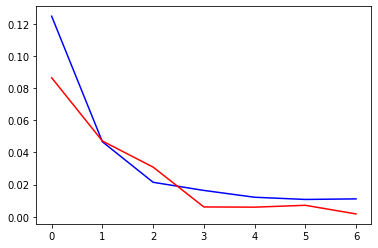

In [18]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

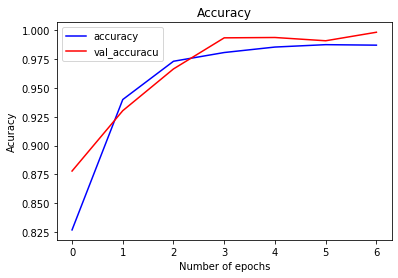

In [19]:
plt.plot(history.history['accuracy'],'b',label="accuracy")
plt.plot(history.history['val_accuracy'],'r',label="val_accuracu")
plt.xlabel('Number of epochs')
plt.ylabel('Acuracy')
plt.title('Accuracy')
plt.legend()
#if not working replace 'accuracy' with 'acc'

In [20]:
#Testing the model
Result=model.predict(test_data)

In [21]:
from sklearn.metrics import r2_score
r2=r2_score(test_target,Result)
print('R2_score:',r2)

R2_score: 0.9922486254738624
